<a href="https://colab.research.google.com/github/roshi45/genai_Assignment2/blob/main/Internship_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/GenAI/student_dropout_prediction_dataset.csv")

In [ ]:
df.head()

,StudentID,Age,Gender,AttendanceRate,GPA,ParentalEducation,FamilyIncome,ExtracurricularParticipation,SchoolType,DistanceToSchool,PreviousSuspensions,SupportServicesUsed,Dropout
0,1,18,Male,98.83,2.99,PhD,75459.79,No,Private,15.54,2,No,Yes
1,2,20,Female,82.09,3.80,Bachelor,82666.74,Yes,Public,6.84,4,Yes,No
2,3,24,Male,96.67,2.93,PhD,68605.23,No,Public,27.86,4,Yes,No
3,4,20,Female,69.68,3.88,High School,70782.90,Yes,Private,26.72,4,Yes,No
4,5,24,Male,56.84,2.57,Master,64055.85,No,Private,4.41,3,Yes,No


In [ ]:
df.shape

(5000, 13)

In [ ]:
 df.head()

,StudentID,Age,Gender,AttendanceRate,GPA,ParentalEducation,FamilyIncome,ExtracurricularParticipation,SchoolType,DistanceToSchool,PreviousSuspensions,SupportServicesUsed,Dropout
0,1,18,Male,98.83,2.99,PhD,75459.79,No,Private,15.54,2,No,Yes
1,2,20,Female,82.09,3.80,Bachelor,82666.74,Yes,Public,6.84,4,Yes,No
2,3,24,Male,96.67,2.93,PhD,68605.23,No,Public,27.86,4,Yes,No
3,4,20,Female,69.68,3.88,High School,70782.90,Yes,Private,26.72,4,Yes,No
4,5,24,Male,56.84,2.57,Master,64055.85,No,Private,4.41,3,Yes,No


In [ ]:
#checking missing values
df.isnull().sum()

,0
StudentID,0
Age,0
Gender,0
AttendanceRate,0
GPA,0
ParentalEducation,0
FamilyIncome,0
ExtracurricularParticipation,0
SchoolType,0
DistanceToSchool,0


In [ ]:
#nformation about te dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   StudentID                     5000 non-null   int64  
 1   Age                           5000 non-null   int64  
 2   Gender                        5000 non-null   object 
 3   AttendanceRate                5000 non-null   float64
 4   GPA                           5000 non-null   float64
 5   ParentalEducation             5000 non-null   object 
 6   FamilyIncome                  5000 non-null   float64
 7   ExtracurricularParticipation  5000 non-null   object 
 8   SchoolType                    5000 non-null   object 
 9   DistanceToSchool              5000 non-null   float64
 10  PreviousSuspensions           5000 non-null   int64  
 11  SupportServicesUsed           5000 non-null   object 
 12  Dropout                       5000 non-null   object 
dtypes: 

In [ ]:
#converting the categorical columns to numerical
categorical_columns = df.select_dtypes(include=['object']).columns

In [ ]:
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
df.head()

,StudentID,Age,Gender,AttendanceRate,GPA,ParentalEducation,FamilyIncome,ExtracurricularParticipation,SchoolType,DistanceToSchool,PreviousSuspensions,SupportServicesUsed,Dropout
0,1,18,1,98.83,2.99,3,75459.79,0,0,15.54,2,0,1
1,2,20,0,82.09,3.80,0,82666.74,1,1,6.84,4,1,0
2,3,24,1,96.67,2.93,3,68605.23,0,1,27.86,4,1,0
3,4,20,0,69.68,3.88,1,70782.90,1,0,26.72,4,1,0
4,5,24,1,56.84,2.57,2,64055.85,0,0,4.41,3,1,0


In [ ]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)


                              StudentID       Age    Gender  AttendanceRate  \
StudentID                      1.000000 -0.015326 -0.009552       -0.017484   
Age                           -0.015326  1.000000  0.003430       -0.000056   
Gender                        -0.009552  0.003430  1.000000        0.007867   
AttendanceRate                -0.017484 -0.000056  0.007867        1.000000   
GPA                           -0.003771 -0.002321  0.013151        0.019481   
ParentalEducation             -0.013137  0.000527  0.005695       -0.005515   
FamilyIncome                  -0.016292  0.008804  0.004455       -0.008035   
ExtracurricularParticipation  -0.026093  0.000675 -0.019189        0.001193   
SchoolType                     0.008616  0.001757  0.015240        0.043140   
DistanceToSchool              -0.024955  0.011145 -0.003218        0.014871   
PreviousSuspensions           -0.003430 -0.031748 -0.017009       -0.004599   
SupportServicesUsed           -0.003987 -0.013793  0

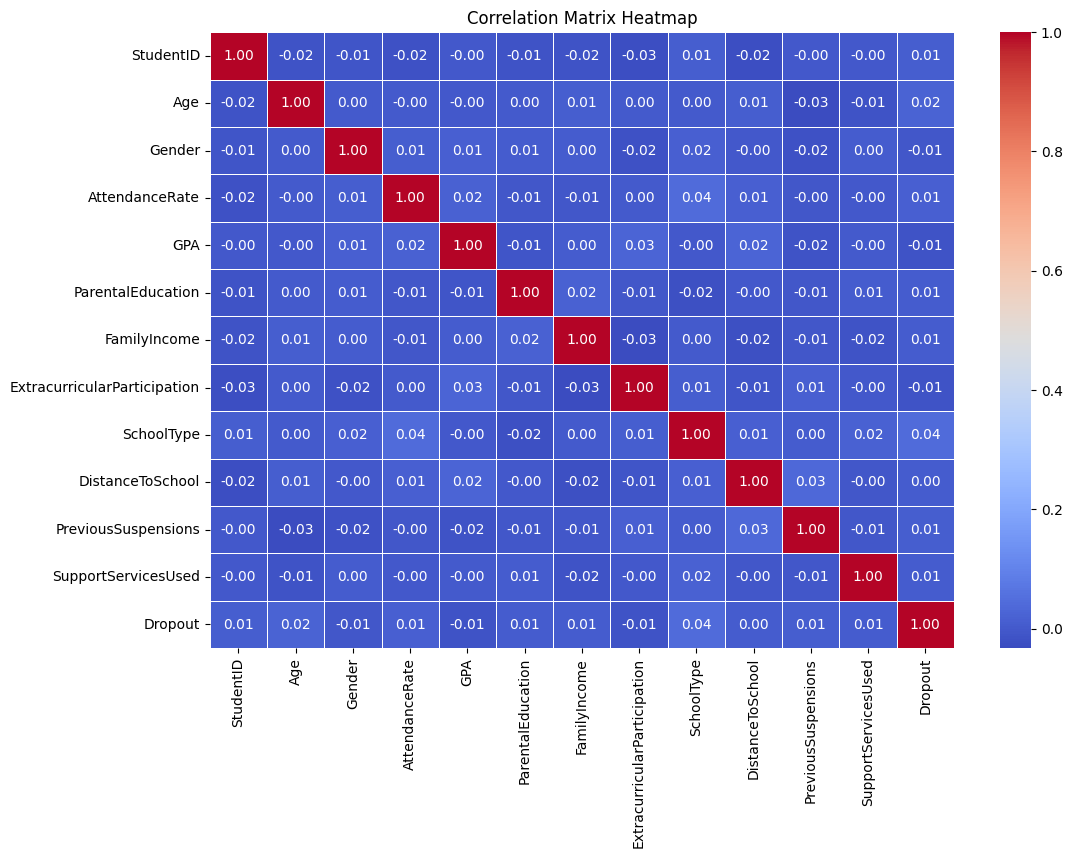

In [ ]:

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
# Set a threshold for correlation
threshold = 0.8

# Get the correlation matrix
corr_matrix = df.corr()

# Identify highly correlated features
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column].abs() > threshold)]

# Drop the highly correlated features
df_reduced = df.drop(columns=to_drop)
print(f"Dropped features: {to_drop}")


Dropped features: []


In [ ]:
numeric_columns = ['StudentID',	'Age',	'Gender',	'AttendanceRate',	'GPA',	'ParentalEducation',	'FamilyIncome',	'ExtracurricularParticipation'	,'SchoolType',	'DistanceToSchool',	'PreviousSuspensions','SupportServicesUsed',	'Dropout']

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

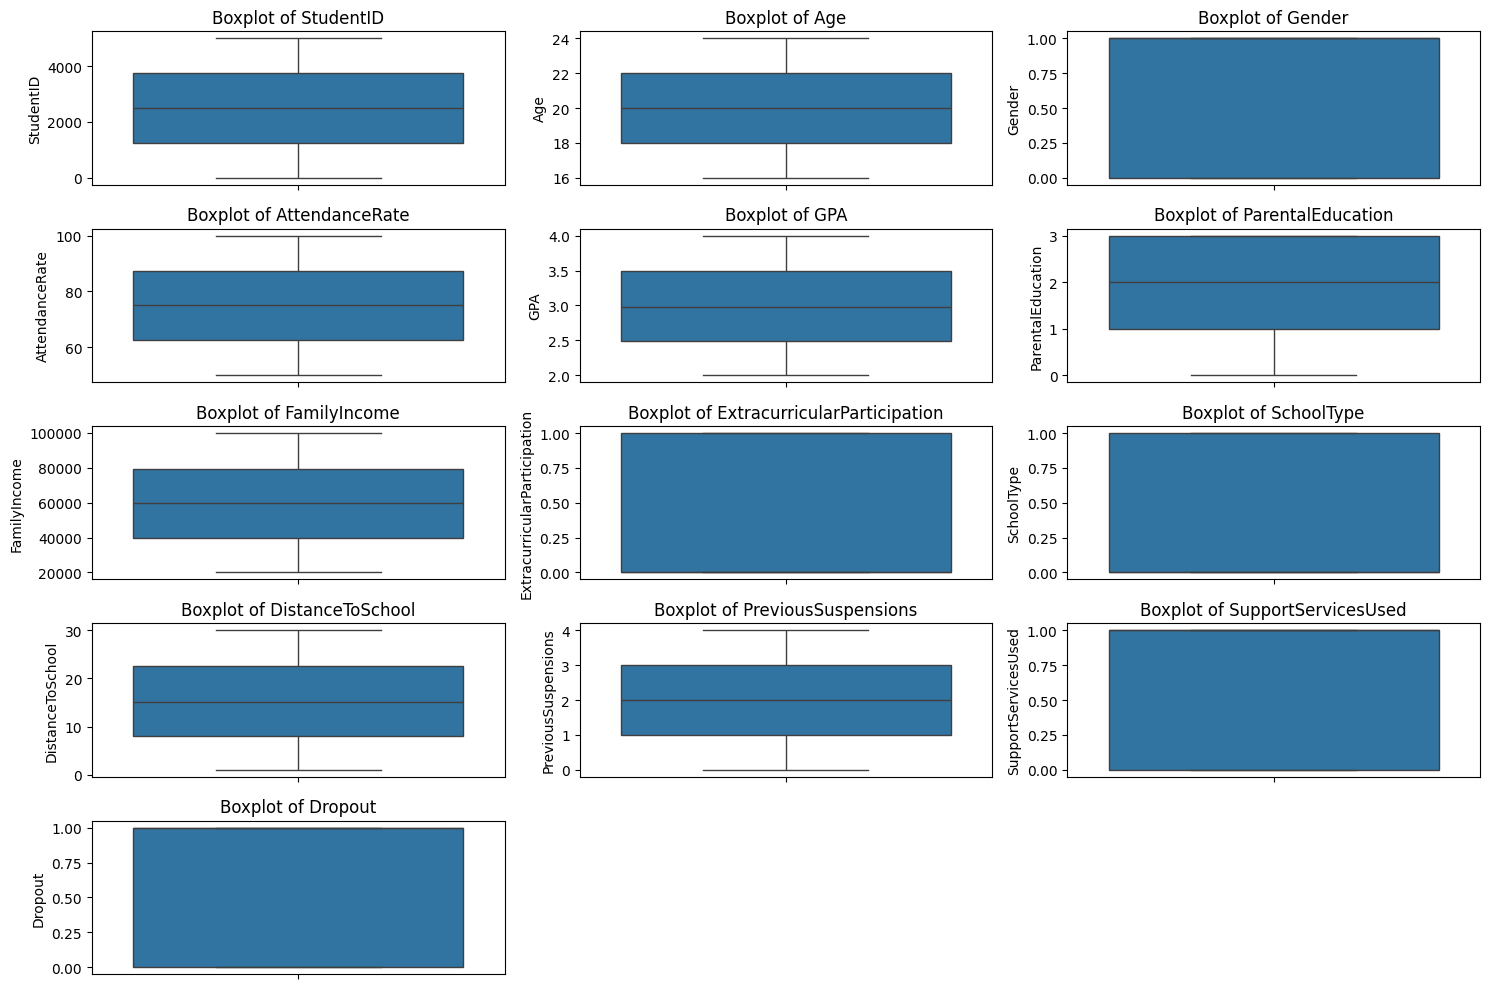

In [ ]:
import matplotlib.pyplot as plt
import math
num_columns = len(numeric_columns)
num_rows = math.ceil(num_columns / 3)

# Plot boxplots
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [ ]:
X=df.drop('Dropout',axis=1)
y=df['Dropout']

In [ ]:
#ntandardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=0.95)  # Keeps 95% of variance
X_pca = pca.fit_transform(X_scaled)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [ ]:
# Assuming you still have the column names from the original DataFrame
column_names = ["StudentID", "Age", "Gender", "AttendanceRate", "GPA",
                "ParentalEducation", "FamilyIncome", "ExtracurricularParticipation",
                "SchoolType", "DistanceToSchool", "PreviousSuspensions", "SupportServicesUsed"]

# Convert X_train and X_test back to DataFrames with column names
X_train_df = pd.DataFrame(X_train, columns=column_names)
X_test_df = pd.DataFrame(X_test, columns=column_names)

# Now you can drop the columns with low correlation
X_train_reduced = X_train_df.drop(['FamilyIncome', 'PreviousSuspensions', 'SupportServicesUsed'], axis=1)
X_test_reduced = X_test_df.drop(['FamilyIncome', 'PreviousSuspensions', 'SupportServicesUsed'], axis=1)


In [ ]:

print("Explained variance ratio by PCA components:", pca.explained_variance_ratio_)
print("Reduced number of features:", X_pca.shape[1])

Explained variance ratio by PCA components: [0.09030857 0.0883479  0.08683743 0.08564551 0.08469387 0.0836216
 0.08350878 0.08182216 0.08163444 0.08023861 0.07800127 0.07533986]
Reduced number of features: 12


**LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression(max_iter=2000)

In [ ]:
  best_models = {}

In [ ]:
log_reg.fit(X_train, y_train)
best_models["Logistic Regression"] = log_reg

**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)
best_models["Decision Tree"] = decision_tree


**RANDOM FOREST**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a base RandomForest model
rf = RandomForestClassifier()

# Perform the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator for prediction
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Update the best_models dictionary with the best Random Forest model
best_models["Random Forest"] = best_rf



Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

**GRADIENT BOOSTING**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gb = GradientBoostingClassifier()
param_grid_gb = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 0.5]}

grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=3, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)
best_models["Gradient Boosting"] = grid_search_gb.best_estimator_
print("Best Params for Gradient Boosting:", grid_search_gb.best_params_)


Best Params for Gradient Boosting: {'learning_rate': 0.01, 'n_estimators': 50}


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
best_models["KNN"] = knn_model


**SVM**

In [ ]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)
best_models["SVM"] = svm_model


**Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"AUC-ROC: {auc:.2f}")
    print(classification_report(y_test, y_pred))

# Evaluate all models
for model_name, model in best_models.items():
    print(f"Evaluating {model_name}...")
    evaluate_model(model, X_test, y_test)


Evaluating Logistic Regression...
Accuracy: 49.50%
Precision: 0.50
Recall: 0.59
F1-Score: 0.54
AUC-ROC: 0.49
              precision    recall  f1-score   support

           0       0.49      0.40      0.44       500
           1       0.50      0.59      0.54       500

    accuracy                           0.49      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.49      0.49      0.49      1000

Evaluating Decision Tree...
Accuracy: 50.00%
Precision: 0.50
Recall: 0.47
F1-Score: 0.48
AUC-ROC: 0.50
              precision    recall  f1-score   support

           0       0.50      0.53      0.52       500
           1       0.50      0.47      0.48       500

    accuracy                           0.50      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.50      0.50      0.50      1000

Evaluating Gradient Boosting...
Accuracy: 49.40%
Precision: 0.50
Recall: 0.92
F1-Score: 0.65
AUC-ROC: 0.49
              precision    

Evaluating Logistic Regression...
Logistic Regression Accuracy: 49.50%
Evaluating Decision Tree...
Decision Tree Accuracy: 50.00%
Evaluating Gradient Boosting...
Gradient Boosting Accuracy: 49.40%
Evaluating KNN...
KNN Accuracy: 50.30%
Evaluating SVM...
SVM Accuracy: 47.80%
Evaluating Random Forest...
Random Forest Accuracy: 48.30%


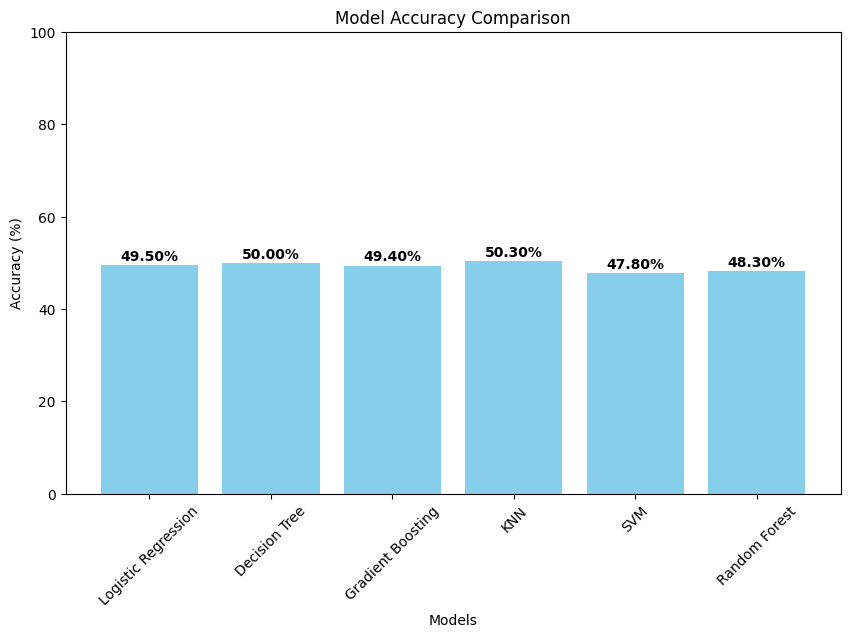

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Dictionary to store accuracy values for each model
accuracy_dict = {}

# Function to evaluate models and store accuracy
def evaluate_model(model_name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_dict[model_name] = accuracy * 100  # Store as percentage
    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")

# Evaluate all models and store accuracies
for model_name, model in best_models.items():
    print(f"Evaluating {model_name}...")
    evaluate_model(model_name, model, X_test, y_test)

# Now plot the accuracies using a bar graph
plt.figure(figsize=(10, 6))
plt.bar(accuracy_dict.keys(), accuracy_dict.values(), color='skyblue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')  # Change ylabel to reflect percentage
plt.ylim([0, 100])  # Change y-axis limit to 0 to 100 for percentage
plt.xticks(rotation=45)

# Adding percentage labels on top of the bars
for i, v in enumerate(accuracy_dict.values()):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')

plt.show()


In [ ]:
import joblib
joblib.dump(knn_model, 'knn_model.pkl')

print("KNN model saved as knn_model.pkl")

KNN model saved as knn_model.pkl


In [ ]:
import pickle
from sklearn.neighbors import KNeighborsClassifier

# Example KNN model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Save the model
with open('/content/knn_model.pkl', 'wb') as f:
    pickle.dump(model, f)
